<a href="https://colab.research.google.com/github/Atul14258/ai/blob/main/AI_PracticalsFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Family Tree Prolog

In [ ]:
male(jack).
male(oliver).
male(ali).
male(james).
male(simon).
male(harry).
female(helen).
female(sophie).
female(jess).
female(lily).
parent_of(jack, jess).
parent_of(jack, lily).
parent_of(helen, jess).
parent_of(helen, lily).
parent_of(oliver, james).
parent_of(sophie, james).
parent_of(jess, simon).
parent_of(ali, simon).
parent_of(lily, harry).
parent_of(james, harry).
father_of(X, Y) :-
 male(X),
 parent_of(X, Y).
mother_of(X, Y) :-
 female(X),
 parent_of(X, Y).
grandfather_of(X, Y) :-
 male(X),
 parent_of(X, Z),
 parent_of(Z, Y).
grandmother_of(X, Y) :-
 female(X),
 parent_of(X, Z),
 parent_of(Z, Y).
sister_of(X, Y) :-
 female(X),
 parent_of(F, Y),
 parent_of(F, X),
 X \= Y.
brother_of(X, Y) :-
 male(X),
 parent_of(F, Y),
 parent_of(F, X),
 X \= Y.
aunt_of(X, Y) :-
 female(X),
 parent_of(Z, Y),
 sister_of(Z, X).
uncle_of(X, Y) :-
 parent_of(Z, Y),
 brother_of(Z, X).
ancestor_of(X, Y) :-
 parent_of(X, Y).
ancestor_of(X, Y) :-
 parent_of(X, Z),
 ancestor_of(Z, Y).
% Predicate to print the family tree
print_family_tree(Person) :-
 write('Family tree for '), write(Person), write(':'), nl,
 print_family_tree_helper(Person, 0).
print_family_tree_helper(Person, Tabs) :-
 Tabs >= 0,
 format('~*c', [Tabs, 32]), % 32 is ASCII code for space
 write(Person), nl,
 ( father_of(Person, Child) ;
 mother_of(Person, Child)
 ),
 NextTabs is Tabs + 4,
 print_family_tree_helper(Child, NextTabs).



 Prolog query goes here

 grandmother_of(X,harry)


 Run this on swish prolog website

#Best First Search

In [ ]:
from queue import PriorityQueue
v = 14
graph = [[] for i in range(v)]

# Function For Implementing Best First Search
# Gives output path having lowest cost


def best_first_search(actual_Src, target, n):
    visited = [False] * n
    pq = PriorityQueue()
    pq.put((0, actual_Src))
    visited[actual_Src] = True

    while pq.empty() == False:
        u = pq.get()[1]
        # Displaying the path having lowest cost
        print(u, end=" ")
        if u == target:
            break

        for v, c in graph[u]:
            if visited[v] == False:
                visited[v] = True
                pq.put((c, v))
    print()

# Function for adding edges to graph


def addedge(x, y, cost):
    graph[x].append((y, cost))
    graph[y].append((x, cost))


# The nodes shown in above example(by alphabets) are
# implemented using integers addedge(x,y,cost);
addedge(0, 1, 3)
addedge(0, 2, 6)
addedge(0, 3, 5)
addedge(1, 4, 9)
addedge(1, 5, 8)
addedge(2, 6, 12)
addedge(2, 7, 14)
addedge(3, 8, 7)
addedge(8, 9, 5)
addedge(8, 10, 6)
addedge(9, 11, 1)
addedge(9, 12, 10)
addedge(9, 13, 2)

source = 0
target = 9
best_first_search(source, target, v)

0 1 3 2 8 9 


#A* search algorithm

In [ ]:
def a_star_algo(start_node, stop_node):
    open_set = {start_node}
    closed_set = set()
    g = {start_node: 0}
    parents = {start_node: start_node}

    def get_neighbors(v):
        if v in graph_nodes:
            return graph_nodes[v]
        else:
            return None

    def heuristic(n):
        h_dist = {
            'S': 5,
            'A': 3,
            'B': 4,
            'C': 2,
            'D': 6,
            'G': 0
        }
        return h_dist[n]

    while open_set:
        n = None
        for v in open_set:
            if n is None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v
        if n == stop_node or n not in graph_nodes:
            break

        open_set.remove(n)
        closed_set.add(n)

        for m, weight in get_neighbors(n):
            if m not in open_set and m not in closed_set:
                open_set.add(m)
                parents[m] = n
                g[m] = g[n] + weight
            elif g[m] > g[n] + weight:
                g[m] = g[n] + weight
                parents[m] = n
                if m in closed_set:
                    closed_set.remove(m)
                    open_set.add(m)

    if stop_node not in parents or stop_node not in graph_nodes:
        print("Path does not exist!")
        return None

    path = [stop_node]
    fitness_numbers = [g[stop_node] + heuristic(stop_node)]
    while parents[path[-1]] != path[-1]:
        path.append(parents[path[-1]])
        fitness_numbers.append(g[path[-1]] + heuristic(path[-1]))
    path.reverse()
    fitness_numbers.reverse()

    print("Start node:", start_node)
    print("Goal node:", stop_node)
    print("Weight of the path:", g[stop_node])
    print("Path found:")
    for i in range(len(path)):
        print("Node:", path[i], ", Fitness Number:", fitness_numbers[i])
    return path

# Define your graph here
graph_nodes = {
    'S': [('A', 1), ('G', 10)],
    'A': [('B', 2), ('C', 1)],
    'B': [('D', 15)],
    'C': [('D', 3), ('G', 4)],
    'D': [('G', 2)],
    'G': []
}

start_node = input("Enter the start node: ")
stop_node = input("Enter the goal node: ")

path = a_star_algo(start_node, stop_node)
if path:
    print("Path:", path)

# Start Node - S, Goal Node - G

Enter the start node: S
Enter the goal node: G
Start node: S
Goal node: G
Weight of the path: 6
Path found:
Node: S , Fitness Number: 5
Node: A , Fitness Number: 4
Node: C , Fitness Number: 4
Node: G , Fitness Number: 6
Path: ['S', 'A', 'C', 'G']


#8 puzzle problem

In [ ]:
# Python3 program to print the path from root
# node to destination node for N*N-1 puzzle
# algorithm using Branch and Bound
# The solution assumes that instance of
# puzzle is solvable

import heapq
import time

class PuzzleNode:
    def __init__(self, state, parent=None, move=None, g=0):
        self.state = state
        self.parent = parent
        self.move = move
        self.g = g

    def __lt__(self, other):
        return (self.g + self.h()) < (other.g + other.h())

    def __eq__(self, other):
        return self.state == other.state

    def __hash__(self):
        return hash(tuple(self.state))

    def h(self):
        # Heuristic: Number of misplaced tiles (excluding the empty tile)
        return sum(1 if self.state[i] != goal_state[i] and self.state[i] != 0 else 0 for i in range(9))

    def expand(self):
        successors = []
        zero_index = self.state.index(0)
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
        directions = ['Up', 'Down', 'Left', 'Right']

        for i, move in enumerate(moves):
            new_row = zero_index // 3 + move[0]
            new_col = zero_index % 3 + move[1]
            if 0 <= new_row < 3 and 0 <= new_col < 3:
                new_index = new_row * 3 + new_col
                new_state = self.state[:]
                new_state[zero_index], new_state[new_index] = new_state[new_index], new_state[zero_index]
                successors.append(PuzzleNode(new_state, self, directions[i], self.g + 1))

        return successors

    def get_path(self):
        path = []
        current = self
        while current:
            path.append((current.state, current.move, current.h()))
            current = current.parent
        path.reverse()
        return path

def astar(start_state):
    open_list = []
    closed_set = set()
    heapq.heappush(open_list, start_state)
    start_time = time.time()

    while open_list:
        current_node = heapq.heappop(open_list)
        if current_node.state == goal_state:
            end_time = time.time()
            time_taken = end_time - start_time
            return current_node.get_path(), time_taken

        closed_set.add(tuple(current_node.state))
        successors = current_node.expand()

        for successor in successors:
            if tuple(successor.state) not in closed_set:
                heapq.heappush(open_list, successor)

if __name__ == "__main__":
    print("Enter the initial state (use 0 for the blank space):")
    initial_state = [int(x) for x in input().split()]

    print("Enter the goal state:")
    goal_state = [int(x) for x in input().split()]

    initial_node = PuzzleNode(initial_state)
    solution, time_taken = astar(initial_node)

    if solution:
        print("Solution found:")
        num_steps = len(solution) - 1
        for step in solution:
            print(step[0][:3])
            print(step[0][3:6])
            print(step[0][6:])
            print("Heuristic:", step[2])
            print("Move:", step[1])
            print()
        print("Goal state:")
        print(goal_state[:3])
        print(goal_state[3:6])
        print(goal_state[6:])
        print("Goal state found!")
        print("Number of steps required to reach the goal state:", num_steps)
        print("Time taken to solve the problem:", round(time_taken, 6), "seconds")
    else:
        print("No solution found.")

'''
Enter the initial state (use 0 for the blank space):
2 8 3 1 6 4 7 0 5
Enter the goal state:
1 2 3 8 0 4 7 6 5
'''

Enter the initial state (use 0 for the blank space):
2 8 3 1 6 4 7 0 5
Enter the goal state:
1 2 3 8 0 4 7 6 5
Solution found:
[2, 8, 3]
[1, 6, 4]
[7, 0, 5]
Heuristic: 4
Move: None

[2, 8, 3]
[1, 0, 4]
[7, 6, 5]
Heuristic: 3
Move: Up

[2, 0, 3]
[1, 8, 4]
[7, 6, 5]
Heuristic: 3
Move: Up

[0, 2, 3]
[1, 8, 4]
[7, 6, 5]
Heuristic: 2
Move: Left

[1, 2, 3]
[0, 8, 4]
[7, 6, 5]
Heuristic: 1
Move: Down

[1, 2, 3]
[8, 0, 4]
[7, 6, 5]
Heuristic: 0
Move: Right

Goal state:
[1, 2, 3]
[8, 0, 4]
[7, 6, 5]
Goal state found!
Number of steps required to reach the goal state: 5
Time taken to solve the problem: 0.000317 seconds


#Tower of Hanoi

#Theory for tower of Hanoi

Tower of Hanoi is a mathematical puzzle where we have three rods (A, B, and C) and N disks. Initially, all the disks are stacked in decreasing value of diameter i.e., the smallest disk is placed on the top and they are on rod A. The objective of the puzzle is to move the entire stack to another rod (here considered C), obeying the following simple rules:

Only one disk can be moved at a time.
Each move consists of taking the upper disk from one of the stacks and placing it on top of another stack i.e. a disk can only be moved if it is the uppermost disk on a stack.
No disk may be placed on top of a smaller disk.

In [ ]:
# Recursive Python function to solve tower of hanoi


def TowerOfHanoi(n, from_rod, to_rod, aux_rod):
    if n == 0:
        return
    TowerOfHanoi(n-1, from_rod, aux_rod, to_rod)
    print("Move disk", n, "from rod", from_rod, "to rod", to_rod)
    TowerOfHanoi(n-1, aux_rod, to_rod, from_rod)


# Driver code
N = 3

# A, C, B are the name of rods
TowerOfHanoi(N, 'A', 'C', 'B')


Move disk 1 from rod A to rod C
Move disk 2 from rod A to rod B
Move disk 1 from rod C to rod B
Move disk 3 from rod A to rod C
Move disk 1 from rod B to rod A
Move disk 2 from rod B to rod C
Move disk 1 from rod A to rod C


#ADL script for spare tyre problem
Consider the problem of changing a flat tire. More precisely, the goal is to have a good-spare tire properly mounted onto the car's axle where the initial state has a flat tire on the axle and a good spare tire in the trunk) To keep it simple, our version of the problem is a very abstract one, with no sticky lug nuts or other complications. There are just four actions: removing the spare from the trunk, removing the flat tire from the axle, putting the spare on the axle, and leaving the car unattended overnight. We assume that the car is in a particularly bad neighbourhood, so that the effect of leaving it overnight is that the tires disappear.
The ADL description of the problem is shown in Figure 6.3. Notice that it is purely prepositional. It goes beyond strips in that it uses a negated precondition, At(Flat, Axle), for the PutOn(Spare, Axle) action. This could be avoided by using Clear(Axle) instead, as we will see in the next example.

Consider problem of changing flat tire. There are just 4 actions: removing spare from trunk, removing flat tire from axle, putting spare tire on axle, and leaving car unattended overnight.
ADL description is as shown. It uses negated precondition,negation. This could be avoided by using Clear (Axle) instead. As we see in next example.
Solution using Strips:

* Init(At(Flat,Axle)̂At(Spare,Trunk))
* Goal(At(Spare,Axle)) Action(remove(Spare,Trunk),
* PRECOND ; At(Spare,Trunk)
* EFFECT :̚At(Spare,trunk)˄A t(Spare, Ground)
* Action(Remove(Flat,Axle), • PRECOND:At(Flat,Axle)
* EFFECT :̚At(Flat,,Axle)˄A t(Flat, Ground)
* Action(PutOn(Spare,Axle),
* PRECOND ; At(Spare,Ground)˄̚At(Flat,Axle)
* EFFECT:̚At(Spare,Ground) ˄̚At(Spare,Axle))
* Action(LeaveOvernight)
* PRECOND
* EFFECT :̚At(Spare,Ground)˄A t(Spare, Axle)̚˄At(Spare,trunk)˄ ̚At(Flat,Ground)˄̚At(Flat,Axle))

#ADL script for cargo plane airport problem

The problem can be defined with three actions: Load, Unload and Fly. The actions affect two predicates: In(c,p) means that cargo c is inside plane p, and At(x, a) means that object x (either plane or cargo) is at airport a. Note that cargo is not at anywhere when it is In a plane, so At really means "available for use at a given location." It takes some experience with action definitions to handle such details consistently.

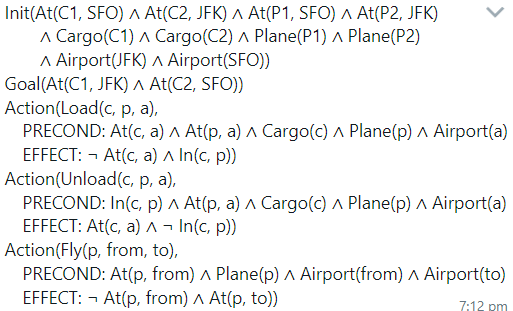